
## Text Clustering

## Aim: To identify the patterns in the given sequence of texts and form clusters based on the similarity


## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from collections import defaultdict
from sklearn.cluster import KMeans
from nltk.corpus import wordnet as wn
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk import pos_tag
import re
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Loading the file

In [ ]:
file = open("/content/drive/MyDrive/Colab Notebooks/news.txt", "r")

## Preprocessing the document

In [ ]:
cleaned_train_data = []

lemma =WordNetLemmatizer()
stopwords =stopwords.words("english")
# new_stopword =["india"]
# stopwords.extend(new_stopword)
for text in file:
  text  = re.sub(r"https\S+", "", text) # removing links
  text = re.sub("[^a-zA-Z0-9]", " ", text) # including only alphabets and numericals
  text = nltk.word_tokenize(text.lower()) # tokenization
  text = [lemma.lemmatize(word) for word in text] # lemmatization
  text = [word for word in text if word not in stopwords] # stopwords
  text = " ".join(text)
  cleaned_train_data.append(text)

In [ ]:
cleaned_train_data

['new delhi prime minister narendra modi named 21 largest unnamed island andaman nicobar island param vir chakra awardees ceremony monday occasion parakram diwas',
 'pm modi also unveiled model national memorial dedicated netaji built netaji subhas chandra bose dweep earlier known ross island home minister amit shah wa also present ceremony andaman nicobar island',
 'largest unnamed island wa named first param vir chakra awardee major somnath sharma lost life action november 3 1947 fighting pakistani infiltrator near srinagar airport',
 'island named 21 param vir chakra awardees viz major somnath sharma subedar hony captain lance naik karam singh mm 2nd lt rama raghoba rane nayak jadunath singh company havildar major piru singh capt g salaria lieutenant colonel major dhan singh thapa subedar joginder singh major shaitan singh cqmh abdul hamid lt col ardeshir burzorji tarapore lance naik albert ekka major hoshiar singh 2nd lt arun khetrapal flying officer nirmaljit singh sekhon major ra

## TF-IDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(cleaned_train_data)

# Kmeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100)
kmeans.fit(Z)
centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Cluster 0: rashmika troll problem mandanna life doe talk hate clarity give
Cluster 1: company layoff employment amazon google microsoft 000 like new find
Cluster 2: pathaan film khan rukh shah day screen set big advance
Cluster 3: shetty athiya kl wedding rahul photo khandala suniel reportedly couple
Cluster 4: netaji island bose chandra minister 23 subhas india prime parliament


In [ ]:
def frequencies_dict(cluster_index):
    if cluster_index > 5- 1:
        return
    term_frequencies = kmeans.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

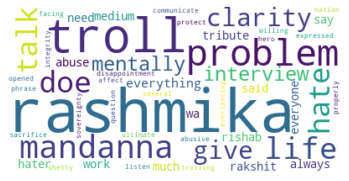

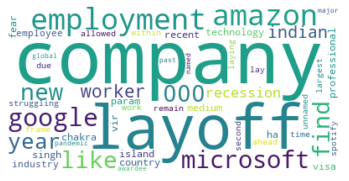

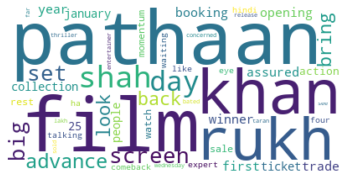

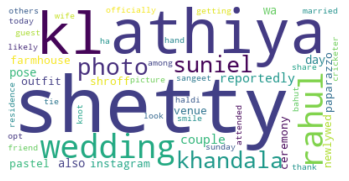

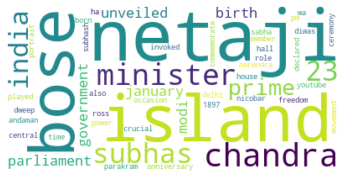

In [ ]:
def makeImage(frequencies):
    wc = WordCloud(background_color="white", max_words=50)
    wc.generate_from_frequencies(frequencies)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(5):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

## Obtaining the optimal number of clusters using Elbow Method and Silhouette Score.

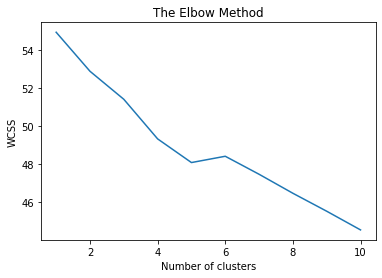

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kms = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kms.fit(Z)
    wcss.append(kms.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

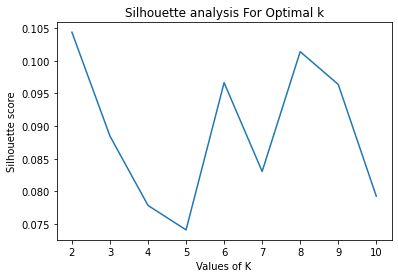

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,11):
 km = KMeans(n_clusters=i, init = 'k-means++', random_state =42)
 km.fit_predict(Z)
 silhouette_avg.append(silhouette_score(Z, km.labels_))

sns.lineplot(range(2,11),silhouette_avg)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

## K-Means Clustering for 2 clusters

Cluster 0: employment find new allowed remain within frame struggling professional visa
Cluster 1: shetty athiya island rashmika kl ha wedding film rahul day


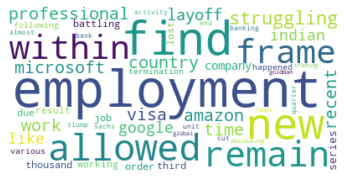

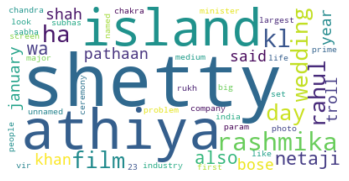

In [ ]:
kms = KMeans(n_clusters=2, init='k-means++', max_iter=100)
kms.fit(Z)
centroids = kms.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

def frequencies_dict(cluster_index):
    if cluster_index > 2- 1:
        return
    term_frequencies = kms.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies):
    wc = WordCloud(background_color="white", max_words=50)
    wc.generate_from_frequencies(frequencies)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(2):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

Cluster 0: rapidly growing wave potential recalibrates move ahead technology past latest
Cluster 1: shetty athiya kl rashmika wedding film rahul ha day island
Cluster 2: awardee largest named unnamed chakra vir param island second first
Cluster 3: abusing change used requested rather admits negative affected phrase clarity
Cluster 4: titled pride secretariat programme training research accordingly parliamentary institute democracy
Cluster 5: employment find new allowed remain within frame struggling professional visa


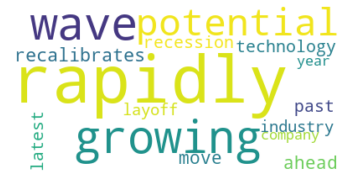

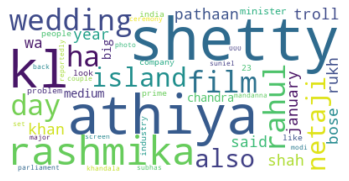

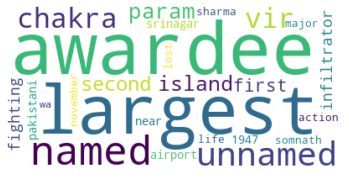

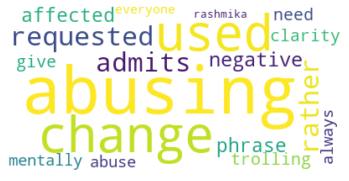

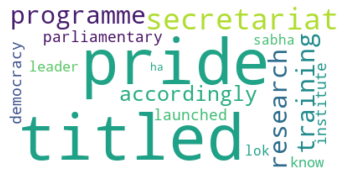

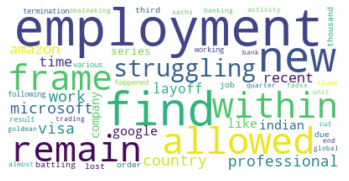

In [ ]:
kmns = KMeans(n_clusters=6, init='k-means++', max_iter=100)
kmns.fit(Z)
centroids = kmns.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

def frequencies_dict(cluster_index):
    if cluster_index > 6- 1:
        return
    term_frequencies = kmns.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies):
    wc = WordCloud(background_color="white", max_words=50)
    wc.generate_from_frequencies(frequencies)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(6):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

# Conclusion:
### The given corpus consists of documents belonging to three different categories. Initially the model was built using 5 clusters and the optimal number of clusters using the Elbow Method is 5 and Silhoutte Score is two. But the two clusters did not result in meaning clusters. Therefore, 5 is the optimal number of clusters.